In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Dropout

%matplotlib inline

In [2]:
df = pd.read_csv("Google_Stock_Price_Train.csv")
print(df.head(3))

       Date    Open    High     Low   Close     Volume
0  1/3/2012  325.25  332.83  324.97  663.59  7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45  5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21  6,590,300


In [3]:
Training_Set = df.iloc[:,1:2]
print(Training_Set.head(2))
print("\n")
print(Training_Set.shape)

     Open
0  325.25
1  331.27


(1258, 1)


In [4]:
Training_Set = Training_Set.values

In [5]:
#Applying Transformation 
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [6]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i,0])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i,0])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(1198, 60)
(1198,)


In [7]:
# Shape should be Number of [Datapoints , Steps , features=1 )
# we convert into 3-d Vector 
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))

In [8]:
# Architecture of our Neural Network
regressor = Sequential()

regressor.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_Train, Y_Train, epochs = 60, batch_size = 32)

Epoch 1/60
38/38 [==============================] - 4s 40ms/step - loss: 0.4335
Epoch 2/60
38/38 [==============================] - 2s 42ms/step - loss: 0.2612
Epoch 3/60
38/38 [==============================] - 1s 37ms/step - loss: 0.1899
Epoch 4/60
38/38 [==============================] - 1s 37ms/step - loss: 0.1406
Epoch 5/60
38/38 [==============================] - 1s 36ms/step - loss: 0.1213
Epoch 6/60
38/38 [==============================] - 1s 35ms/step - loss: 0.0946
Epoch 7/60
38/38 [==============================] - 1s 36ms/step - loss: 0.0804
Epoch 8/60
38/38 [==============================] - 1s 36ms/step - loss: 0.0678
Epoch 9/60
38/38 [==============================] - 1s 36ms/step - loss: 0.0602
Epoch 10/60
38/38 [==============================] - 1s 36ms/step - loss: 0.0521
Epoch 11/60
38/38 [==============================] - 1s 39ms/step - loss: 0.0458
Epoch 12/60
38/38 [==============================] - 1s 37ms/step - loss: 0.0405
Epoch 13/60
38/38 [==================

In [9]:
df1 = pd.read_csv('Google_Stock_Price_Test.csv')
df1.head(2)

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"


In [10]:
Df_Total = pd.concat((df["Open"], df1["Open"]), axis=0)

In [11]:
# Preparing the testing input

inputs = Df_Total[len(Df_Total) - len(df1) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
    
# Convert into Numpy Array
X_test = np.array(X_test)
# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_stock_price = regressor.predict(X_test)
# Do inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Text(0, 0.5, 'Price in $')

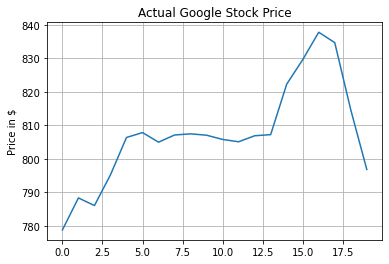

In [12]:
# change the index to Date 
df1["Open"].plot()
plt.title("Actual Google Stock Price")
plt.grid(True)
plt.ylabel("Price in $")

In [13]:
Prediction = pd.DataFrame(data={
    "Date":df1["Date"].to_list(),
    "Open":df1["Open"],
    "Network Predicted":[x[0] for x in predicted_stock_price ]
})

<AxesSubplot:>

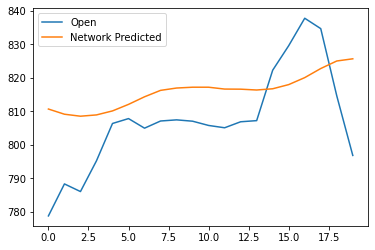

In [14]:
Prediction.plot()

In [15]:
Prediction

,Date,Open,Network Predicted
0,1/3/2017,778.81,810.711060
1,1/4/2017,788.36,809.163757
2,1/5/2017,786.08,808.571045
3,1/6/2017,795.26,808.956299
4,1/9/2017,806.40,810.151550
5,1/10/2017,807.86,812.102417
6,1/11/2017,805.00,814.366699
7,1/12/2017,807.14,816.282410
8,1/13/2017,807.48,816.980652
9,1/17/2017,807.08,817.225098


In [21]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_Train, Y_Train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 9s 82ms/step - loss: 0.0474
Epoch 2/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0069
Epoch 3/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0066
Epoch 5/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0059
Epoch 6/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0046
Epoch 13/100
38/38 [=====

38/38 [==============================] - 3s 82ms/step - loss: 0.0014


In [22]:
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [23]:
Prediction = pd.DataFrame(data={
    "Date":df1["Date"].to_list(),
    "Open":df1["Open"],
    "Network Predicted":[x[0] for x in predicted_stock_price ]
})

<AxesSubplot:>

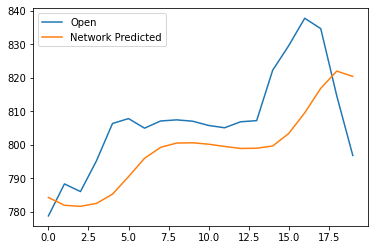

In [24]:
Prediction.plot()

In [25]:
Prediction

,Date,Open,Network Predicted
0,1/3/2017,778.81,784.313904
1,1/4/2017,788.36,781.981750
2,1/5/2017,786.08,781.666748
3,1/6/2017,795.26,782.543213
4,1/9/2017,806.40,785.307251
5,1/10/2017,807.86,790.523987
6,1/11/2017,805.00,796.010010
7,1/12/2017,807.14,799.264832
8,1/13/2017,807.48,800.549072
9,1/17/2017,807.08,800.646973
